# Implementation of SVC

## Accessing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db=pd.read_csv('diabetes.csv')

In [3]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
db.shape

(768, 9)

## Preprocessing the data

In [5]:
y=db['Outcome']

In [6]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [7]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
X=db.drop(['Outcome'],axis=1)

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Splitting the data

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                test_size=0.2,random_state=10)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Building the model

In [18]:
from sklearn.svm import SVC

svc_lin=SVC(kernel='linear',probability=True)
svc_lin=svc_lin.fit(X_train,y_train)



In [19]:
y_pred=svc_lin.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [20]:
y_pred_prob=svc_lin.predict_proba(X_test)
y_pred_prob

array([[0.45103762, 0.54896238],
       [0.79237665, 0.20762335],
       [0.51800675, 0.48199325],
       [0.88296208, 0.11703792],
       [0.8894251 , 0.1105749 ],
       [0.93894989, 0.06105011],
       [0.90196823, 0.09803177],
       [0.68774581, 0.31225419],
       [0.92350473, 0.07649527],
       [0.60883357, 0.39116643],
       [0.9128631 , 0.0871369 ],
       [0.74414778, 0.25585222],
       [0.13685056, 0.86314944],
       [0.68587003, 0.31412997],
       [0.87942221, 0.12057779],
       [0.30809207, 0.69190793],
       [0.24354123, 0.75645877],
       [0.94210293, 0.05789707],
       [0.8920845 , 0.1079155 ],
       [0.10027702, 0.89972298],
       [0.66358932, 0.33641068],
       [0.51724966, 0.48275034],
       [0.68625253, 0.31374747],
       [0.79195523, 0.20804477],
       [0.83240043, 0.16759957],
       [0.36291507, 0.63708493],
       [0.72550327, 0.27449673],
       [0.98650354, 0.01349646],
       [0.35277776, 0.64722224],
       [0.20011263, 0.79988737],
       [0.

In [14]:
y_test

568    0
620    0
456    0
197    1
714    0
      ..
264    1
706    1
194    0
179    1
514    0
Name: Outcome, Length: 154, dtype: int64

## Performance of the model

In [16]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
    
    

 Confusion Matrix:
 [[87  8]
 [29 30]]
 The report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.82        95
           1       0.79      0.51      0.62        59

    accuracy                           0.76       154
   macro avg       0.77      0.71      0.72       154
weighted avg       0.77      0.76      0.75       154

 Score: 0.7121320249776985


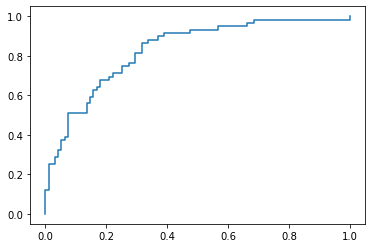

In [23]:
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
score=roc_auc_score(y_test,y_pred)
print(' Confusion Matrix:\n',cm)
print(' The report:\n',report)
print(' Score:',score)
fpr,tpr,_=roc_curve(y_test,y_pred_prob[:,1])
plt.plot(fpr,tpr);

## Hyper parameter tuning

### Tuning the kernel

In [34]:
def SVC_kernel_tune(kernel):
    model=SVC(kernel=kernel,probability=True)
    model=model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)
    cm=confusion_matrix(y_test,y_pred)
    score=roc_auc_score(y_test,y_pred)
    report=classification_report(y_test,y_pred)
    # fpr,tpr,_=roc_curve(y_test,y_pred_prob[:,1])
    print(' SVC Model with kernel:', kernel)
    print( '      *************.  ')
    print(' The confusion Matrix')
    sns.heatmap(cm,annot=True)
    print(' The classification Report:\n', report)
    print(' The ROC-AUC-Score:',score)
    

 SVC Model with kernel: linear
      *************.  
 The confusion Matrix
 The classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.82        95
           1       0.79      0.51      0.62        59

    accuracy                           0.76       154
   macro avg       0.77      0.71      0.72       154
weighted avg       0.77      0.76      0.75       154

 The ROC-AUC-Score: 0.7121320249776985


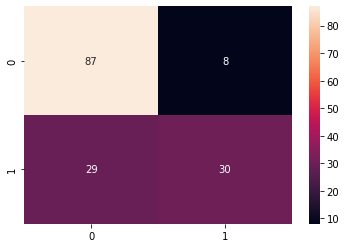

In [35]:
# Calling the function

SVC_kernel_tune('linear')

 SVC Model with kernel: poly
      *************.  
 The confusion Matrix
 The classification Report:
               precision    recall  f1-score   support

           0       0.70      0.93      0.80        95
           1       0.75      0.36      0.48        59

    accuracy                           0.71       154
   macro avg       0.72      0.64      0.64       154
weighted avg       0.72      0.71      0.68       154

 The ROC-AUC-Score: 0.6411239964317573


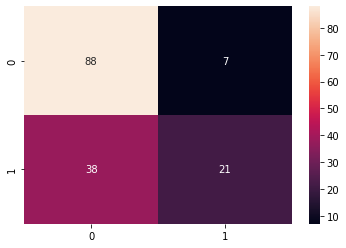

In [36]:
SVC_kernel_tune('poly')

 SVC Model with kernel: rbf
      *************.  
 The confusion Matrix
 The classification Report:
               precision    recall  f1-score   support

           0       0.70      0.92      0.79        95
           1       0.73      0.37      0.49        59

    accuracy                           0.71       154
   macro avg       0.72      0.64      0.64       154
weighted avg       0.71      0.71      0.68       154

 The ROC-AUC-Score: 0.6443354148082068


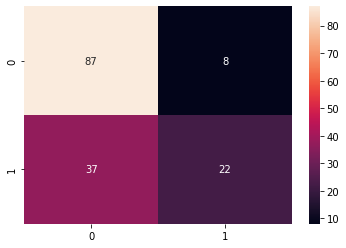

In [37]:
SVC_kernel_tune('rbf')

 SVC Model with kernel: sigmoid
      *************.  
 The confusion Matrix
 The classification Report:
               precision    recall  f1-score   support

           0       0.58      0.76      0.66        95
           1       0.23      0.12      0.16        59

    accuracy                           0.51       154
   macro avg       0.41      0.44      0.41       154
weighted avg       0.45      0.51      0.47       154

 The ROC-AUC-Score: 0.4382694023193577


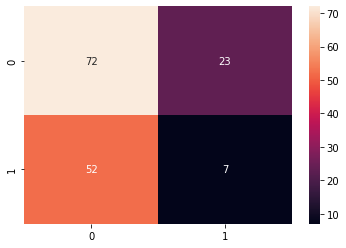

In [38]:
SVC_kernel_tune('sigmoid')

* Note:
    
    The best value of kernel: 'linear'

### Tuning the regularisation parameter C

In [40]:
# Creating a fn with a list of C as the parameter

def SVC_C_tuner(C_list):
    for c in C_list:
        model=SVC(kernel='linear',C=c)
        model=model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        score=roc_auc_score(y_test,y_pred)
        print(' The value of C:',c, 'The score:',score)

In [41]:
# The list of C values:

C_list=[0.1,1,2,3,4,5,10,15,20,25,30]

In [42]:
SVC_C_tuner(C_list)

 The value of C: 0.1 The score: 0.703657448706512
 The value of C: 1 The score: 0.7121320249776985
 The value of C: 2 The score: 0.7068688670829617
 The value of C: 3 The score: 0.7068688670829617
 The value of C: 4 The score: 0.7068688670829617
 The value of C: 5 The score: 0.7068688670829617
 The value of C: 10 The score: 0.7016057091882248
 The value of C: 15 The score: 0.7016057091882248
 The value of C: 20 The score: 0.7290811775200713
 The value of C: 25 The score: 0.7068688670829617
 The value of C: 30 The score: 0.7068688670829617


In [43]:
C_list=[18,19,21,22]
SVC_C_tuner(C_list)

 The value of C: 18 The score: 0.715343443354148
 The value of C: 19 The score: 0.7068688670829617
 The value of C: 21 The score: 0.7068688670829617
 The value of C: 22 The score: 0.7068688670829617


#### The best and the final model: kernel='linear', C=20

In [ ]:
# The final model

svc_final=SVC(kernel='linear',C=20, probability= True)
svc_final=svc_final.fit(X_train,y_train)
y_pred=svc_final.predict(X_test)
y_pred_prob=svc_final.predict_proba(X_test)
cm=confusion_matrix(y_test,y_pred)
score=roc_auc_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
fpr,tpr,_=roc_curve(y_test,y_pred_prob[:,1])
print(' SVC Model with kernel: linear')
print( '      *************.  ')
print(' The confusion Matrix')
sns.heatmap(cm,annot=True)
print(' The classification Report:\n', report)
print(' The ROC-AUC-Score:',score)